# Video game market analysis

# Project goal:

Analyze the video game market tendentions using the data until 2016 and identify patterns that determine the success of the game.\
This will allow the video game retailer (the client of the study) to predict a potentially popular product and plan future advertising campaigns around it.

# Project planning
- Prepare the data for the analysis (check for missing values, duplicates, etc.)
- Light data exploration
- Historical sales analysis
    - Determine life cycle of a platform
    - Determine which gaming platforms are relevant today
- Analyse sales patterns across different platforms
- Analyse critic and players reviews (score) influence on commercial success of the game
- What genres have highest/lowest sales?
- Analyse and compare customer behavior in different regions
- Check whether users similarly score games on different platforms or of different genres?
- Give recommendations to the client based on the study.

# Data description

- Name — game title
- Platform — platform
- Year_of_Release
- Genre
- NA_sales — sales in North America (millions of copies)
- EU_sales
- JP_sales
- Other_sales — sales in other countries (millions of copies)
- Critic_Score — score given by the video game critics (max 100)
- User_Score — user score (max 10)
- Rating — rating given by ESRB (Entertainment Software Rating Board). This rating determines the age category for the game.

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(10, 6)})

from scipy import stats as st

# Prepare the data

In [2]:
df = pd.read_csv('C:/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# check duplicates
df.duplicated().sum()

0

- Some of the columns have missing values
- User score type should be changed to int
- No full duplicates

Let's rename columns for convenience

In [7]:
df.columns = [column.lower() for column in list(df.columns)]

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Let's change the data types where it is necessary

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- year_of_release to datetime
- user_score to float
- platform, genre and rating to categorical

In [10]:
categorical = ['platform', 'genre', 'rating']

for i in categorical:
    print(i)
    print(df[i].unique())
    print()

platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

rating
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']



No duplicates in data, thus I can turn the data type to categorical.

In [11]:
for i in categorical:
    df[i] = df[i].astype('category')

In [12]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y')

In [13]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There is string data "tbd" in the user_score column. Thus, I should do something about it first before I could change the data type and analyze it.

Quick googling shows that tbd stands for 'To Be Determined', thus there is no user_score for these games at the moment when the data was collected.\
In this case btbd could be changed to nans and handled the same way.

In [14]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

In [15]:
df['user_score'].isnull().value_counts()

False    10014
True      6701
Name: user_score, dtype: int64

In [16]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
df['user_score'].isnull().value_counts()

True     9125
False    7590
Name: user_score, dtype: int64

Number of nans increased, thus everythin was done correctly.\
Now I can change the data type to float

In [18]:
df['user_score'] = df['user_score'].astype('float')

# Handling missing values

In [19]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Name**

In [20]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Two misterious games for the GEN platform. Probably some cursed sonic video games :)\
It would be best to get rid of them

In [21]:
df.dropna(subset = ['name'], inplace = True)

**year_of_release**

In [22]:
df['year_of_release'].isnull().value_counts()

False    16444
True       269
Name: year_of_release, dtype: int64

In [23]:
df['year_of_release'].isnull().value_counts(normalize=True)

False    0.983905
True     0.016095
Name: year_of_release, dtype: float64

Only 1.6% of data is missing the year of release.\
This information is crucial for my analysis, thus I will delete these missing values.

In [24]:
df.dropna(subset = ['year_of_release'], inplace = True)

In [25]:
df['year_of_release'].isnull().value_counts()

False    16444
Name: year_of_release, dtype: int64

**critic_score and user_score**

In [26]:
df['critic_score'].isnull().value_counts()

True     8461
False    7983
Name: critic_score, dtype: int64

Half of the games have critic score missing.

There are no obvious ways to reliably recover this data.\
For this reason I will leave nans and proceed with the analysis.

In [27]:
df['user_score'].isnull().value_counts()

True     8981
False    7463
Name: user_score, dtype: int64

Same goes for the user_score

**rating**

In [28]:
df['rating'].unique()

['E', NaN, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Categories (8, object): ['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T']

In [29]:
df['rating'].isnull().value_counts(normalize=True)

False    0.594016
True     0.405984
Name: rating, dtype: float64

I've got 40% of the dataset missing rating information.

I think it would be best to fill these nans with "undefined" value to see the distribution of these games.

In [30]:
df['rating'] = df['rating'].cat.add_categories('undefined').fillna('undefined')

In [31]:
df['rating'].value_counts()

undefined    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

In [32]:
df['rating'].isnull().value_counts()

False    16444
Name: rating, dtype: int64

# Data exploration

Before I start the analysis let's add a total sales across all regions column to the table.

In [33]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


## Year of release

In [35]:
release_years = df.pivot_table(index = 'year_of_release', 
                                  values = 'name', 
                                  aggfunc = 'count'
                                 ).sort_values(by = 'name', 
                                               ascending = False)

In [36]:
release_years.columns = ['number_of_games']

In [37]:
release_years.head()

,number_of_games
year_of_release,
2008-01-01,1427
2009-01-01,1426
2010-01-01,1255
2007-01-01,1197
2011-01-01,1136


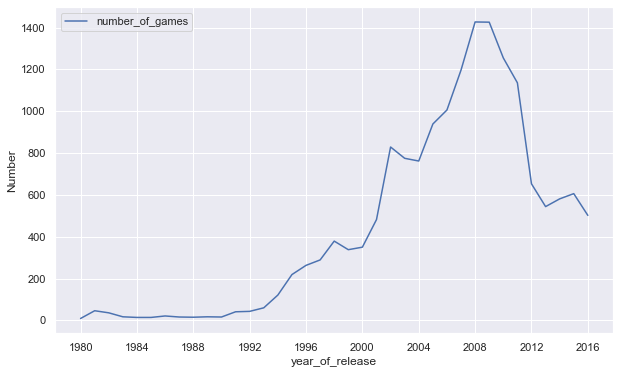

In [38]:
sns.lineplot(data=release_years)
plt.ylabel('Number')
plt.show()

As you can see on the chart above, we have a different amount of data on the number of games released in certain years.
More specifically, we don't have much data on games released before 1994. I believe that this data will not be required for my analysis due to the small number of datapoints.

In [39]:
df = df[df['year_of_release'] > pd.to_datetime(1993, format = '%Y')]

In [40]:
# check the most early game just in case
df['year_of_release'].min()

Timestamp('1994-01-01 00:00:00')

## Sales across different platforms

In [41]:
platforms = df.pivot_table(index = ['platform'], 
                           values = 'total_sales', 
                           aggfunc = 'sum')

In [42]:
platforms = platforms.reset_index().sort_values(by = 'total_sales', ascending = False)

In [43]:
platforms.head()

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.76


<AxesSubplot:xlabel='total_sales', ylabel='platform'>

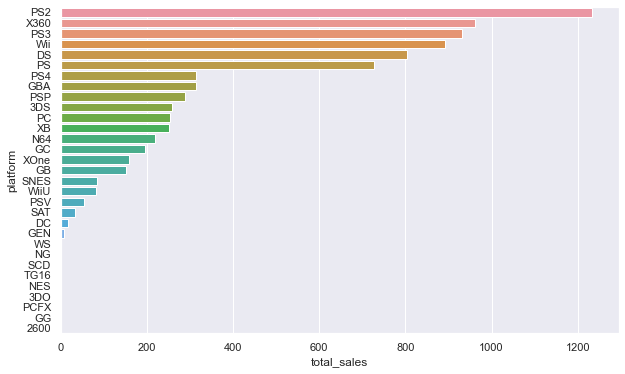

In [44]:
sns.barplot(data=platforms, x='total_sales', y='platform', orient='h', order=platforms.platform, )

Some of the platforms have almost no games in this dataset. These platforms are also outdated, thus will most likely be irrelevant for the anlysis. For these reasons I will exclude all platforms that have less games than PSV. 

In [45]:
# PSV sales
psv_sales = float(platforms[platforms['platform'] == 'PSV']['total_sales'])
psv_sales

53.81

In [46]:
relevant_platforms = platforms[(platforms['total_sales'] > psv_sales)]['platform']

In [47]:
df_relevant = df.query('platform in list(@relevant_platforms)')

In [48]:
df_relevant.platform = df_relevant.platform.cat.remove_unused_categories()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
df_relevant.platform.value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
GC       542
3DS      512
PS4      392
N64      316
XOne     247
WiiU     147
SNES     144
GB        67
Name: platform, dtype: int64

irrelevant game platforms were removed

Now I can analyze the sales data across different platforms

In [50]:
df_platform_sales = df_relevant.pivot_table(index = 'year_of_release', 
                                            columns = 'platform', 
                                            values = 'total_sales', 
                                            aggfunc = 'sum')

According to the task description 2016 data is not full (most likely the data was extracted before 2016 was over), thus I will remove this data from the analysis 

In [51]:
df_platform_sales = df_platform_sales.drop(np.datetime64('2016-01-01'), axis = 0)

In [52]:
df_platform_sales.replace(0, np.nan, inplace=True)

Let's check when most of the were made for each platform

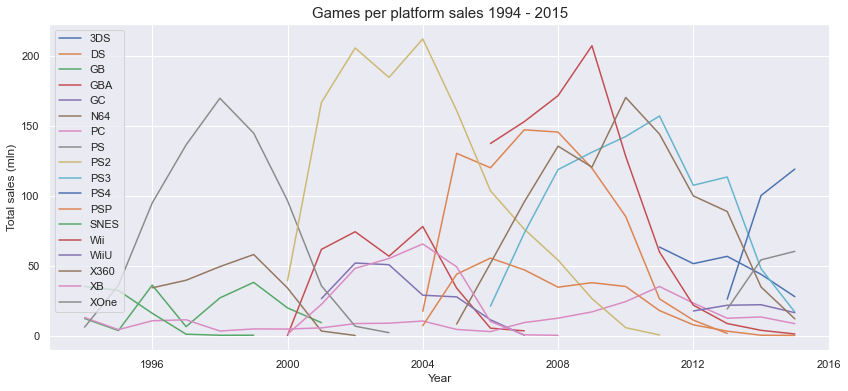

In [53]:
plt.figure(figsize=(14,6))
plt.title("Games per platform sales 1994 - 2015", fontsize=15)
for platform in df_platform_sales.columns:
    sns.lineplot(data=df_platform_sales[platform], label = platform)

plt.xlabel("Year")
plt.ylabel("Total sales (mln)")
plt.show()

Based on the data above, it is possible to estimate the lifespan of different gaming platforms.

Thus, the first successful platform with total sales in a year (at least based on the available data) is PS, the first to sell more than 100 million copies of games in 1996 and end its life cycle by about 2002.

The next big gaming platform was PS2, released in 1999 and quickly gained popularity, sales grew until 2004 and only by 2008 fell below 50 million a year.

This was followed by DS, which launched in 2004 and began to lose popularity by 2008; The Xbox360, which launched in 2005, peaked in 2010 and then lost sales until 2016.

An interesting example is the Wii platform, which launched in 2006 and immediately gained popularity, but also abruptly lost it after 3 years.

To better illustrate it, I will plot a similar chart only for the most successful platforms.

In [54]:
top_games = df_platform_sales[['PS', 'PS2', 'X360', 'PS3', 'Wii', 'DS', '3DS']]

Text(0, 0.5, 'Total sales (mln)')

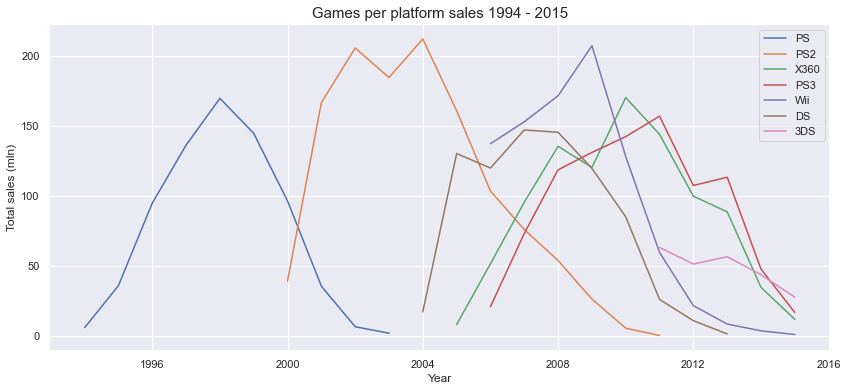

In [55]:
plt.figure(figsize=(14,6))
plt.title("Games per platform sales 1994 - 2015", fontsize=15)

for platform in top_games.columns:
    sns.lineplot(data=df_platform_sales[platform], label = platform)

plt.xlabel("Year")
plt.ylabel("Total sales (mln)")

Text(0, 0.5, 'Total sales (mln)')

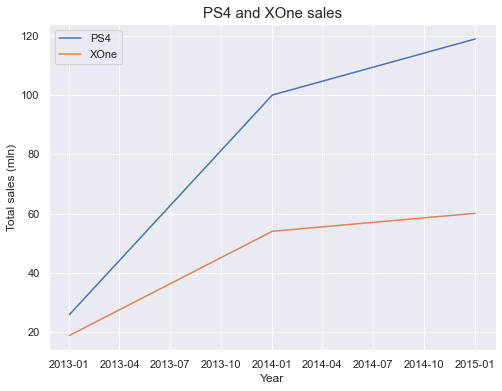

In [56]:
plt.figure(figsize=(8,6))
plt.title("PS4 and XOne sales", fontsize=15)

for platform in ['PS4', 'XOne']:
    sns.lineplot(data=df_platform_sales[platform], label = platform)

plt.xlabel("Year")
plt.ylabel("Total sales (mln)")

- PS appeared and reached its peak in the period 1994 - 1998 (4 years) and by 2002 sales had dropped to almost zero (it also took 4 years)

- PS2 started and peaked in the period 1998 - 2004 (6 years) after which the popularity faded until 2010 (6 years)

- DS appeared in 2004, peaked in 2008 (4 years) and died out by 2012 (4 years)

- PS3 came out in 2005, peaked in 2011 (6 years) and lost popularity by 2016 (5 years)

- X360 was also released in 2005 and in general followed the path of PS3

- 3DS was released in 2011 and still remains a relevant platform in 2016, although apparently sales have been going down since 2013

Based on historical data, it can be concluded that a successful console gains popularity for 4-6 years before reaching its peak, after which it gradually loses popularity for the same number of years.\
In total, the life of the console is 8-12 years. It is also worth noting that Nintendo consoles: DS, 3DS and Wii have shorter life cycle compared to PS platforms

Currenty PS4 and XOne released in 2013, as well as the 3DS, are relevant and potentially profitable platforms.

If PS4 and XOne follow the trajectory of the previous generation of game consoles, then we can expect that they are yet to reach their pick popularity in ~2019, after which they will remain relevant for 4-6 years.\
The popularity of 3DS is gradually declining.

Let's take a look only at most recent platforms

In [57]:
relevant_platforms = ['Wii', 'X360', 'PS3', '3DS', 'PS4', 'XOne']

In [58]:
relevant_years = [i for i in list(df_platform_sales.index) if i > np.datetime64('2004-01-01')]

In [59]:
relevant_platforms_sales = df_platform_sales.loc[relevant_years]
relevant_platforms_sales = relevant_platforms_sales[relevant_platforms]

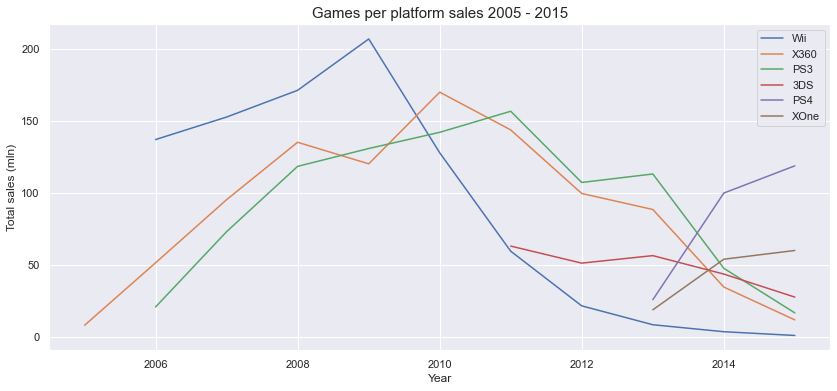

In [60]:
plt.figure(figsize=(14,6))

plt.title("Games per platform sales 2005 - 2015", fontsize=15)

for platform in relevant_platforms:
    sns.lineplot(data=relevant_platforms_sales[platform], label = platform)

plt.xlabel("Year")
plt.ylabel("Total sales (mln)")
plt.show()

This chart clearly shows the life cycle of the previous generation of consoles - PS3, X360 and Wii, which quickly overtook competitors and also quickly lost its popularity.

## Distributions of sales across different platforms

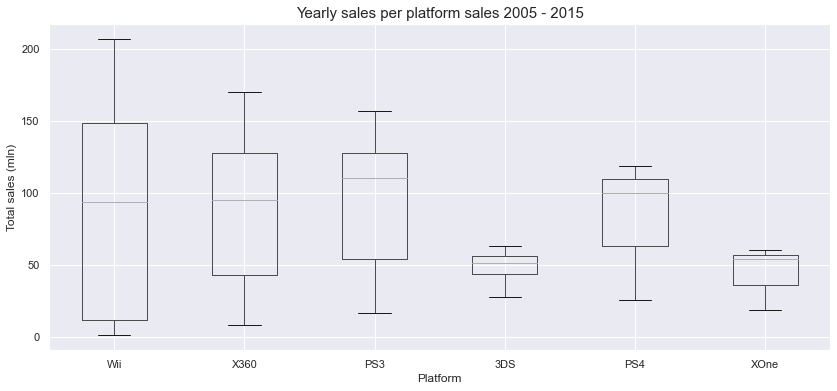

In [61]:
plt.figure(figsize=(14,6))
plt.title("Yearly sales per platform sales 2005 - 2015", fontsize=15)
relevant_platforms_sales.boxplot(grid = True)
plt.xlabel("Platform")
plt.ylabel("Total sales (mln)")
plt.show()

From the boxplot, you can see that games on the previous generation of PS3 and X360 consoles had similar sales dynamics, but PS3 was more successful, selling about 20 million more copies on average.

The behavior of the Wii platform stands out - as in the chart above, you can see that the console has quartiles very far from the average and a high maximum value, which indicates that games on this console sold very unevenly throughout its life cycle.

Its complete opposite will be the 3DS console, which sells an average of 50 million copies a year with little variation.

Finally, despite the fact that PS4 was released relatively recently (3 years ago), the average annual sales are at a high level of 100 million copies per year, twice outperforming the competitor XOne.

Now I will explore total sales across these platforms to see how games are sold there.

In [62]:
games_relevant = df[(df['platform'].isin(relevant_platforms)) &
                    (df['year_of_release'].isin(relevant_years))].copy()
games_relevant.platform = games_relevant.platform.cat.remove_unused_categories()

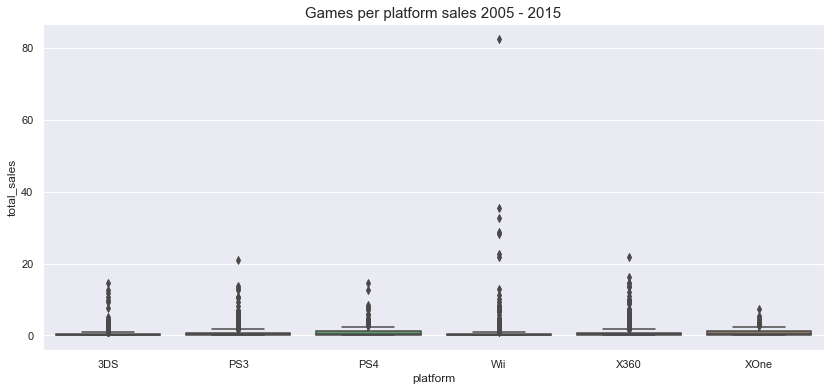

In [63]:
plt.figure(figsize=(14,6))
plt.title("Games per platform sales 2005 - 2015", fontsize=15)
sns.boxplot(x=games_relevant["platform"], y =games_relevant["total_sales"])
plt.show()

Interesting to see outliers on this chart — certain games that sold way more compared to the average sales.\
Most extreme cases are on the Wii platform. Let's check what are these games.

In [64]:
games_relevant[(games_relevant['platform'] == 'Wii') & (games_relevant['total_sales'] > 20)]['name']

0                    Wii Sports
2                Mario Kart Wii
3             Wii Sports Resort
7                      Wii Play
8     New Super Mario Bros. Wii
13                      Wii Fit
15                 Wii Fit Plus
Name: name, dtype: object

Outliers in the data are immediately visible - specifically, the extremely high sales of one game with sales of more than 80 million copies - Wii Sports for the Wii console.\
Most of the outliers among new generation consoles also come from Wii and sports games, the main selling point of the Wii console that Sony and Microsoft would later try to copy with their Kinect systems and those funny PS Move joysticks if you remember those.

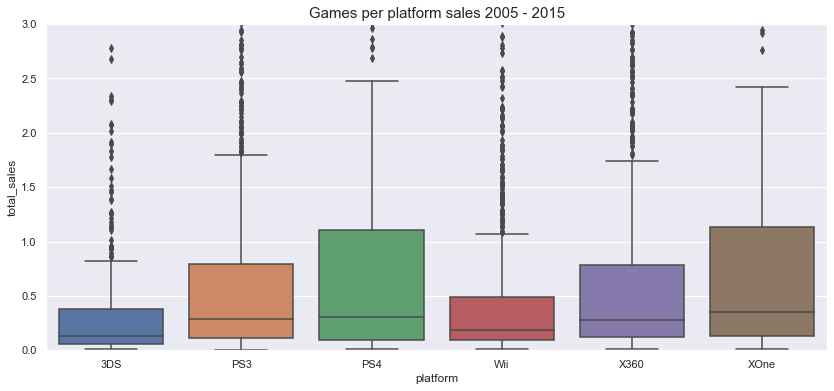

In [65]:
plt.figure(figsize=(14,6))
plt.title("Games per platform sales 2005 - 2015", fontsize=15)
sns.boxplot(x=games_relevant["platform"], y =games_relevant["total_sales"])
plt.ylim([0,3])
plt.show()

Despite a large number of very successful games, the average sales of the Wii console are lower than those of its X360 and PS3 competitors. Apparently, the console remained relevant only thanks to a few hits that quite literally created a market for sports games using new Wii controllers.

XBox360 and PS3 have almost the same charts - in this generation of consoles, Microsoft managed to compete with Sony (which cannot be said about the previous generation in which PS2 dominated the whole game console market)

When compared to today's consoles, PS4 and XOne are almost on par, having the same placement of middle and lower/upper quartiles. However, as you can see from the graph above, there are more hits on PS4 selling more copies than the average game for these consoles, i.e. more than 2.5 million.

The third modern console — 3DS continues to follow Nintendo's policy of relying on sales of unique games that all owners of the console will purchase. Where Sony and Microsoft clash, Nintendo seems to be inventing a new market (and the upcoming Switch will continue to prove this rule)

## Critic and user score analysis

In [66]:
def score_to_sales_corr(platform, df, enable_chart=True):
    platform_games = df[df['platform'] == platform][['critic_score', 'user_score', 'total_sales']]
    
    critic_corr = platform_games['total_sales'].corr(platform_games['critic_score'])
    user_corr = platform_games['total_sales'].corr(platform_games['user_score'])
    
    print("Correlation coefficient between user score and sales on", platform, "=", user_corr)
    print("Correlation coefficient between critic score and sales on", platform, "=:", critic_corr)    
    
    if enable_chart == True:
        plt.figure(figsize=(10,4))
        a = sns.scatterplot(x=platform_games['user_score'], 
                            y=platform_games['total_sales'], 
                            c = ['b'], 
                            alpha = 0.6, 
                            label = 'user_score')
        b = sns.scatterplot(x=(platform_games['critic_score'] / 10), 
                            y=platform_games['total_sales'], 
                            c = ['r'], 
                            alpha = 0.6, 
                            label = 'critic_score')
        plt.xlabel('Score')
        plt.show()

Correlation coefficient between user score and sales on Wii = 0.11283121360773782
Correlation coefficient between critic score and sales on Wii =: 0.17790728577594914


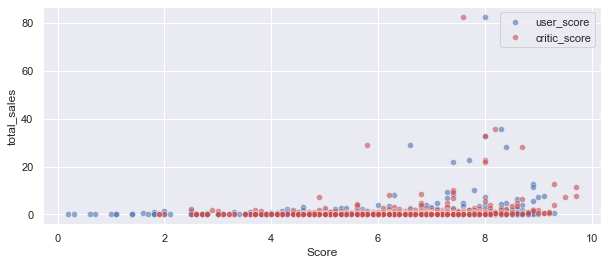

Correlation coefficient between user score and sales on X360 = 0.11124535675258382
Correlation coefficient between critic score and sales on X360 =: 0.39286589254006987


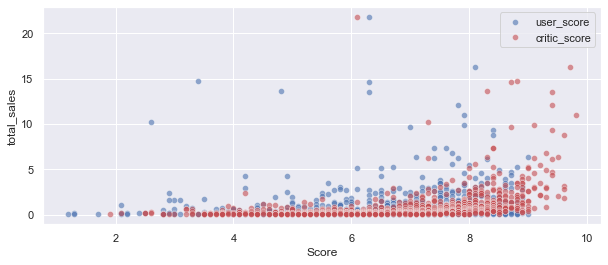

Correlation coefficient between user score and sales on PS3 = 0.12426430250873323
Correlation coefficient between critic score and sales on PS3 =: 0.4327589578997134


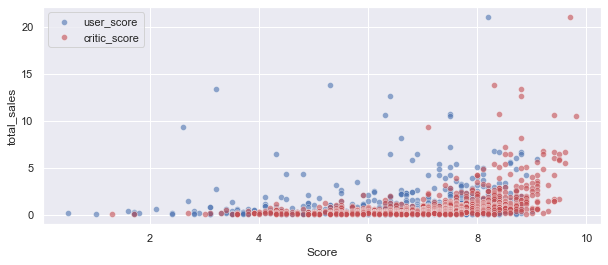

Correlation coefficient between user score and sales on 3DS = 0.23441244400535474
Correlation coefficient between critic score and sales on 3DS =: 0.3610269340210956


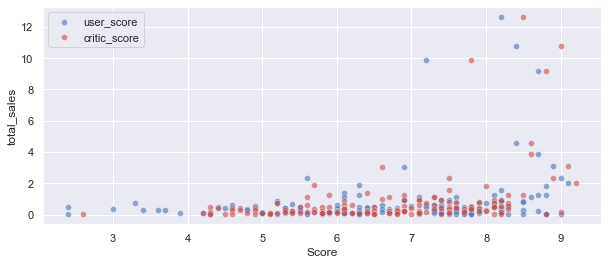

Correlation coefficient between user score and sales on PS4 = 0.024230832360622553
Correlation coefficient between critic score and sales on PS4 =: 0.4318482049982005


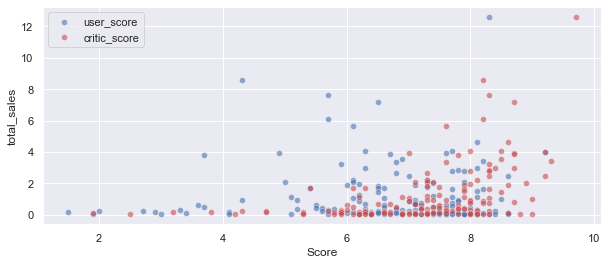

Correlation coefficient between user score and sales on XOne = -0.03926828544552199
Correlation coefficient between critic score and sales on XOne =: 0.4593845680707106


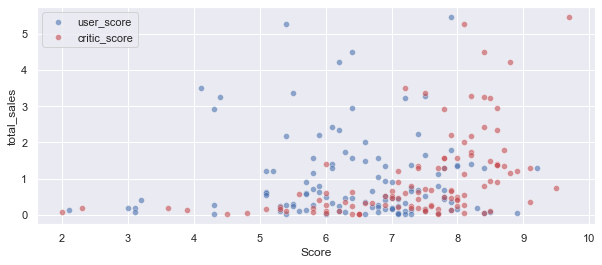

In [67]:
for platform in relevant_platforms:
    score_to_sales_corr(platform, games_relevant)

Let's take a look at the correlations again

In [68]:
for platform in relevant_platforms:
    score_to_sales_corr(platform, games_relevant, enable_chart=False)
    print()

Correlation coefficient between user score and sales on Wii = 0.11283121360773782
Correlation coefficient between critic score and sales on Wii =: 0.17790728577594914

Correlation coefficient between user score and sales on X360 = 0.11124535675258382
Correlation coefficient between critic score and sales on X360 =: 0.39286589254006987

Correlation coefficient between user score and sales on PS3 = 0.12426430250873323
Correlation coefficient between critic score and sales on PS3 =: 0.4327589578997134

Correlation coefficient between user score and sales on 3DS = 0.23441244400535474
Correlation coefficient between critic score and sales on 3DS =: 0.3610269340210956

Correlation coefficient between user score and sales on PS4 = 0.024230832360622553
Correlation coefficient between critic score and sales on PS4 =: 0.4318482049982005

Correlation coefficient between user score and sales on XOne = -0.03926828544552199
Correlation coefficient between critic score and sales on XOne =: 0.45938456

As you can see, across all games the correlation between critic ratings and sales is higher than with player ratings. 
We can suggest that the critics score is a more significant parameter for predicting the success of the game regardless of the platform.

At the same time Wii console stands out where the ratings of both players and critics almost do not correlate with sales. Apparently Nintendo managed to create hype around their sports games, leading to people buying them without looking at the reviews.

For the rest of the consoles critic scores are higher correlated with sales - ~0.4 correlation coefficient. That is the critic score could be one of the parameters of predicting the success of the game but should not be solely used for that.

## Video game genre distributions

In [69]:
genre_sales = games_relevant.groupby('genre')['total_sales'].agg(['sum', 'mean', 'std']
                                                                ).sort_values(by = 'sum', 
                                                                              ascending = False)

In [70]:
genre_sales.columns = ['total_sales', 'mean_sales', 'std']
genre_sales.sort_values(by = 'mean_sales', ascending = False)
genre_sales

,total_sales,mean_sales,std
genre,,,
Action,806.61,0.669386,1.350504
Sports,621.78,0.833485,3.546002
Shooter,607.77,1.318373,2.440077
Misc,371.54,0.637290,1.850365
Role-Playing,266.37,0.772087,1.479728
Racing,229.70,0.733866,2.300760
Platform,167.68,1.110464,2.854544
Fighting,130.16,0.622775,1.163797
Simulation,87.70,0.487222,0.979840


The most popular genre is Action. Since 2005 more than 800 million games in this genre have been sold. Next come sports games and shooters.

On average shooters are the top-selling games with each shooter selling 1.3 million copies on average.

Adventure, Puzzle, Strategy, Simulation genres appear to be least popular both by total sales and on average.

An interesting exception is Platform genre. Despite the low overall sales each platformer sells an average of 1.1 million copies.

Action games despite the highest sales in absolute numbers have an average sales of about 670,000 copies per game.\
This may indicate that there are simply many games that sell differently in the Action genre.

## Who is a typical videogamer in each region?

In this section I will analyze customers behaviour in different regions.\
I expect to see that people in different regions would prefer different video games.\
Let's check it.

In [71]:
# calculates top 5 genres, platforms in the region
def top_region_games(region):
    region_games = games_relevant[[region, 'platform', 'genre', 'rating']]
    top_platforms = region_games.groupby('platform')[region].sum().sort_values(ascending = False).head()
    top_genres = region_games.groupby('genre')[region].sum().sort_values(ascending = False).head()
    return top_platforms, top_genres
    
    
def esrb_rating_influence(region):
    region_games = games_relevant[[region, 'platform', 'genre', 'rating']]
    esrb_rated = region_games.groupby('rating')[region].agg(
        ['sum', 'mean', 'std']).sort_values(by = 'sum', ascending = False).head()
    return esrb_rated

In [72]:
na_top_platforms, na_top_genres = top_region_games('na_sales')
na_esrb_influence = esrb_rating_influence('na_sales')

print(na_top_platforms)
print()
print(na_top_genres)
print()
print(na_esrb_influence)

platform
X360    595.05
Wii     486.81
PS3     389.46
PS4      87.25
XOne     78.85
Name: na_sales, dtype: float64

genre
Action          389.16
Shooter         327.30
Sports          327.00
Misc            210.06
Role-Playing    113.91
Name: na_sales, dtype: float64

              sum      mean       std
rating                               
E          517.23  0.478474  1.728096
M          511.96  0.756219  1.309149
T          312.08  0.316511  0.497475
E10+       212.35  0.329225  0.546469
undefined  161.69  0.130923  0.425844


In [73]:
eu_top_platforms, eu_top_genres = top_region_games('eu_sales')
eu_esrb_influence = esrb_rating_influence('eu_sales')

print(eu_top_platforms)
print()
print(eu_top_genres)
print()
print(eu_esrb_influence)

platform
PS3     325.95
X360    267.61
Wii     258.21
PS4     109.31
3DS      58.94
Name: eu_sales, dtype: float64

genre
Action     265.03
Sports     201.07
Shooter    195.21
Misc       105.84
Racing      91.69
Name: eu_sales, dtype: float64

              sum      mean       std
rating                               
M          328.67  0.485480  0.851404
E          316.32  0.292618  1.254189
T          161.35  0.163641  0.284074
undefined  140.88  0.114073  0.388398
E10+       114.76  0.177922  0.325556


In [74]:
jp_top_platforms, jp_top_genres = top_region_games('jp_sales')
jp_esrb_influence = esrb_rating_influence('jp_sales')

print(jp_top_platforms)
print()
print(jp_top_genres)
print()
print(jp_esrb_influence)

platform
3DS     92.59
PS3     78.11
Wii     68.28
X360    12.30
PS4     10.22
Name: jp_sales, dtype: float64

genre
Role-Playing    64.94
Action          59.79
Sports          28.87
Misc            20.84
Platform        18.73
Name: jp_sales, dtype: float64

             sum      mean       std
rating                              
undefined  99.10  0.080243  0.285818
E          70.79  0.065486  0.370210
T          45.21  0.045852  0.164001
M          36.35  0.053693  0.116789
E10+       10.38  0.016093  0.068313


Looking at the data above it becomes clear that in different regions players prefer different platforms.

In North America the most popular platform is X360 while in the EU players prefer Sony's PS3 consoles.

In Japan, the top platforms positions are taken by Nintendo and Sony consoles: 3DS and PS3.

In terms of genres, the preferences of players in North America and the EU are virtually the same: both regions love action, sports and shooters.

The Japanese market is different — here Role-Playing games hold the first place while shooters did not make it into the top 5. This observation correlates with the most popular consoles — Nintendo DS and 3DS consoles historically didn't have many shooter games.

## Hypothesis testing

###  Mean user score for XOne and PC games are the same

Null Hypothesis: Mean user score for XOne and PC games are the same

Alternative Hypothesis: Mean user score for XOne and PC games are different

In order to test the hypothesis I will use ttest with alpha=0.05

In [75]:
alpha = 0.05

pc_user_score = df[df['platform'] == 'PC']['user_score'].dropna()
pc_user_score_mean = pc_user_score.mean()

xone_user_score = df[df['platform'] == 'XOne']['user_score'].dropna()
xone_user_score_mean = xone_user_score.mean()

print('Average PC user score is', round(pc_user_score_mean, 2))
print('Average Xone user score is', round(xone_user_score_mean, 2))

Average PC user score is 7.07
Average Xone user score is 6.52


In [76]:
results = st.ttest_ind(pc_user_score, xone_user_score, equal_var = True)
print('p-value:', '{:.5}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print("Can't reject the null hypothesis") 

p-value: 9.38e-06
Reject the null hypothesis


The hypothesis that the averages of the two populations are equal is rejected.\
The average user ratings on PC and XOne are statistically significantly different.

###  Mean user score for Action and Sports games are the same

Null Hypothesis: Mean user score for Action and Sports games are the same

Alternative Hypothesis: Mean user score for Action and Sports games are different

In [77]:
alpha = 0.05

action_user_score = df[df['genre'] == 'Action']['user_score'].dropna()
action_user_score_mean = action_user_score.mean()

sports_user_score = df[df['genre'] == 'Sports']['user_score'].dropna()
sports_user_score_mean = sports_user_score.mean()

print('Average Action user score is', round(action_user_score_mean, 2))
print('Average Sports user score is', round(sports_user_score_mean, 2))

Average Action user score is 7.06
Average Sports user score is 6.95


In [78]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = True)
print('p-value:', '{:.5}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print("Can't reject the null hypothesis") 

p-value: 0.064809
Can't reject the null hypothesis


Can't reject the null hypothesis — with more data the difference between action and sports games user score might become more visible.\
But for now we can't reject the idea that the scores are in fact similar

## Conclusion

In this work I analyzed the video game market in a period 1994 - 2016.

During the analysis I got several interesting findings:

1. Successful video game consoles have a life cycle of 8 to 12 years with annual sales peaking around the middle of that period.
2. Released in 2013 the PS4 and XOne are still gaining popularity and we can expect these platforms to continue to be popular until 2023-2025.
3. Currently PS4 show higher average sales compared to XOne.
4. Additionally the retailer should expect to see some sales on Nintendo 3DS. The sales are declining but considering the nature of the Nintendo games, new releases will most likely be sold pretty well in 2017. 
5. Critic score could be used in combination with other factors to predict the game success. This can't be said about user score.
7. Players in diffrent regions prefer different genres and platforms. In NA X360 is the leading platform while in the EU both PS3 and X360 are popular In Japan top selling modern platofrm is Nintendo 3DS. X360 isn't popular in Japan.

The recommendation for the retailer would be to focus on emerging new generation consoles PS4 and XOne while also selling new releases for Nintendo 3DS especially in Japan. 
The retailer should take into account that players from different regions prefer different game genres and platforms.